In [3]:
# Load libraries
import os
os.environ["USE_PYGEOS"] = '0'
import numpy as np
import pandas as pd
#pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from pylab import rcParams
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 72

import seaborn as sns
sns.set_style("darkgrid")
sns.set_context(context="paper", font_scale=1.5, rc=None)
sns.set(font="serif")
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
#import plotly.express as px
#import plotly.graph_objects as go

import geopandas as gpd

import warnings
#warnings.filterwarnings('ignore') 
import time

# IMPORT DATA

In [2]:
def read_csv(run:int, object:str, dropIndex = True):
    if dropIndex:
        return pd.read_csv(f"data/trees/{str(run)}{object}.csv").drop(columns=["Unnamed: 0"])
    else:
        return pd.read_csv(f"data/trees/{str(run)}{object}.csv")

In [3]:
class residualsClass:
    def __init__(self, run):
        self.values = read_csv(run, "residuals_values").rename(columns={"x":"values"})
        self.values_median = read_csv(run, "residuals_values_median")
        self.values_repetitions = read_csv(run, "residuals_values_repetitions")

class evaluationClass:
    def __init__(self, run):
        self.PLACEHOLDER = 0

class predictionClass:
    def __init__(self, run):
        self.values = read_csv(run, "predictions_values").rename(columns={"x":"values"})
        self.values_per_repetion = read_csv(run, "prediction_values_per_repetition")
        self.values_median = read_csv(run, "prediction_values_median")

class importanceClass:
    def __init__(self, run):
        self.per_variable = read_csv(run, "importance_per_variable")
        self.per_repetition = read_csv(run, "importance_per_repetition")
        self.local = read_csv(run, "importance_local")



In [4]:
class treeRepeat:
    def __init__(self, run):
        self.run = run
        self.num_trees = read_csv(run, "num_trees").iloc[0,0]
        self.num_independent_variables = read_csv(run, "num_independent_variables").iloc[0,0]
        self.mtry = read_csv(run, "mtry").iloc[0,0]
        self.min_node_size = read_csv(run, "min_node_size").iloc[0,0]
        self.variable_importance = read_csv(run, "variable_importance")
        self.variable_importance_local = read_csv(run, "variable_importance_local")
        self.prediction_error = read_csv(run, "prediction_error").iloc[0,0]
        self.r_squared = read_csv(run, "r_squared").iloc[0,0]
        self.num_samples = read_csv(run, "num_samples").iloc[0,0]
        self.performance = read_csv(run, "performance")
        self.residuals = residualsClass(run)
        self.evaluation = evaluationClass(run)
        self.predictions = predictionClass(run)
        self.importance = importanceClass(run)

    def info(self):
        print(f"---------------------------\n" \
              f"Model from run: {self.run} \n"\
              f"num_trees: {self.num_trees} \n"\
              f"mtry: {self.mtry} \n"\
              f"num_samples: {self.num_samples} \n"
              f"repetitions: {len(self.predictions.values_per_repetion.columns)} \n")

treeResult = treeRepeat(run=10)


In [5]:
res = treeResult.importance.per_variable.copy()
def keep(x:list[str])->bool:
    if "spatial_predictor" in x[0]:
        return False
    else:
        return True

res["keep"] = res.apply(lambda x: keep(x), axis = 1)
res = res[res["keep"]].drop(columns=["keep"])
res["importance"] = res["importance"].abs()

res.to_csv("data/Tree_importance.csv", index=False)

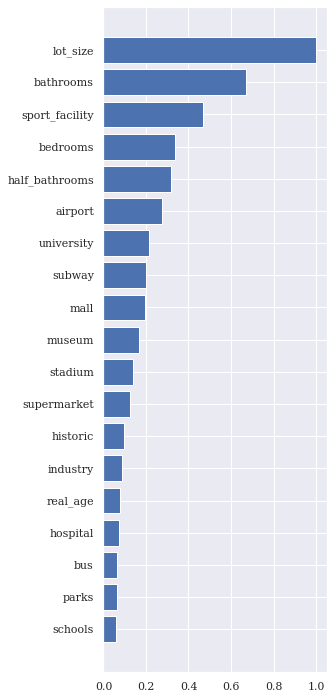

In [54]:
fig, ax = plt.subplots(figsize=(4, 12))
ax.barh(res["variable"], res["importance"])
ax.invert_yaxis()

In [22]:
for i in range(1, 8):
    try:
        treeResult = treeRepeat(run=i)
        treeResult.importance
    except:
        continue

In [4]:
# Load  dataset 
gdf  = gpd.read_file('data/nb_df.gpkg')

# Filtering bools
bools= gdf.select_dtypes(include=['bool'])

# enc = OrdinalEncoder()
# bools_encoded = enc.fit_transform(bools)
# bools_encoded = pd.DataFrame(bools_encoded, columns = bools.columns)

# # removing old bools
gdf = gdf.drop(bools.columns, axis = 1)
gdf = gdf.reset_index(drop = True)

#Adding encoded bools
# gpd.GeoDataFrame(pd.concat([gdf, bools_encoded], axis = 1))
gdf

bedrooms  bathrooms  half_bathrooms  lot_size  construction_size  \
0    1.607506   3.795655       -0.782058 -0.090367           0.101543   
1   -0.789660  -1.259302       -0.782058 -0.164097          -0.170815   
2   -1.588716  -1.259302       -0.782058 -0.141148          -0.147499   
3    5.602784   1.773672       -0.782058 -0.071812           0.169013   
4    0.009395  -0.248311       -0.782058 -0.089390          -0.104834   
..        ...        ...             ...       ...                ...   
694  0.009395   0.560482        1.531052  0.321350           0.125157   
695  0.009395   0.762681        1.145533 -0.047887           0.000835   
696  0.808451   0.762681        1.145533 -0.019078           0.075746   
697  0.009395   1.268176        1.145533 -0.058141          -0.001149   
698  1.074802   0.088686       -0.139527  0.089971          -0.008591   

          age  property_type_id_id  real_age  latitude  longitude  ...  \
0    0.274983             1.361425  2.965947  1.189645  -0.527365  ...   
1   -0.151405            -0.961014  0.167806  0.928072  -0.362927  ...   
2   -0.342970            -0.961014 -1.089330  0.628836  -0.654206  ...   
3   -0.342970             1.361425 -1.089330  0.492163   0.801185  ...   
4   -0.046353             1.361425  0.857203  0.946030  -0.581633  ...   
..        ...                  ...       ...       ...        ...  ...   
694 -0.177359             1.361425 -0.002516 -1.787337   0.108172  ...   
695 -0.293534             1.361425 -0.764908 -0.834495   0.677211  ...   
696 -0.021635             1.361425  1.019414 -0.875106   0.765444  ...   
697  0.058699             1.361425  1.546600 -1.318348  -0.281820  ...   
698 -0.219379             0.587279 -0.278274 -1.936461  -0.853059  ...   

     historic    museum   airport  industry    subway       bus  id_right  \
0   -0.030999  0.142419 -0.086261 -0.280822 -0.360175 -0.457558         8   
1   -0.273689 -0.313227 -0.352554 -0.992470 -0.777304 -0.857703        16   
2   -0.918067 -0.833031 -0.101611  0.366546 -0.586630  0.407494        33   
3   -0.400672 -0.088077 -1.532088 -0.895682 -0.684277 -0.365462        34   
4   -0.471636 -0.921843 -0.131758 -0.528284 -0.702726 -0.678414        35   
..        ...       ...       ...       ...       ...       ...       ...   
694  0.981668  1.568479  1.463781  2.170619  1.131246 -0.605667      1559   
695 -0.623495 -0.368603  0.021319 -0.692475 -0.637533 -0.342341      1561   
696 -1.096245  0.074720  0.046001 -0.401229 -0.435141 -0.669519      1562   
697 -0.162428 -0.217427  1.080662  1.123871  0.560929  1.742792      1563   
698  1.643410  3.282936  1.973052  4.681654  2.358849  2.188619      1564   

            price  price_small  \
0    3.400000e+06     3.400000   
1    2.539500e+06     2.539500   
2    6.950000e+06     6.950000   
3    7.000000e+06     7.000000   
4    4.250000e+06     4.250000   
..            ...          ...   
694  5.742400e+06     5.742400   
695  8.500000e+06     8.500000   
696  7.700000e+06     7.700000   
697  7.200000e+06     7.200000   
698  5.943333e+06     5.943333   

                                              geometry  
0    MULTIPOLYGON (((2793299.849 832180.730, 279330...  
1    MULTIPOLYGON (((2794357.004 830240.705, 279438...  
2    MULTIPOLYGON (((2792835.890 828193.326, 279284...  
3    MULTIPOLYGON (((2801132.447 826978.129, 280115...  
4    MULTIPOLYGON (((2793254.156 830422.310, 279325...  
..                                                 ...  
694  MULTIPOLYGON (((2796977.276 808648.302, 279697...  
695  MULTIPOLYGON (((2800395.769 816279.216, 280039...  
696  MULTIPOLYGON (((2800691.441 815947.949, 280075...  
697  MULTIPOLYGON (((2794204.043 812033.062, 279422...  
698  MULTIPOLYGON (((2782382.857 804523.930, 278242...  

[699 rows x 46 columns]

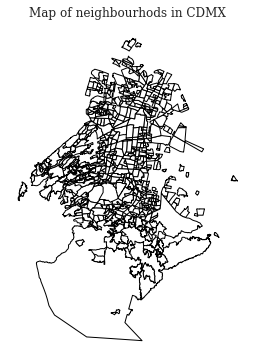

In [7]:
fig, ax = plt.subplots(figsize=(6, 6))
gdf.plot(color = 'white', edgecolor = 'black', ax = ax)
#gdf.centroid.plot(ax = ax)
ax.set_title('Map of neighbourhods in CDMX', fontsize=12)
ax.axis("off")
plt.show()


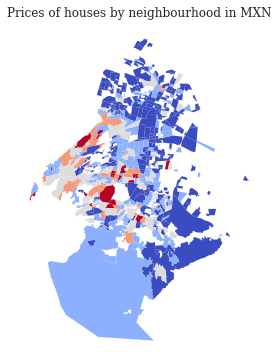

In [12]:
fig, ax = plt.subplots(figsize=(6, 6))
gdf.plot(column='price', cmap = 'coolwarm', linewidth=0.01, scheme = 'FisherJenks', k=5, legend=False, legend_kwds={'bbox_to_anchor':(1.10, 0.96)},  ax=ax)
ax.set_title('Prices of houses by neighbourhood in MXN', fontsize=12)
ax.axis("off")
plt.show()

# Load the R data

In [17]:
tree_Importance = treeResult.importance.local
tree_prediction = treeResult.predictions.values_per_repetion

def getMean(x):
    return np.mean(x)

def getStd(x):
    return np.std(x)

reps = tree_prediction.columns.to_list()
tree_prediction["mean"] = tree_prediction[reps].apply(lambda x: getMean(x), axis=1)
tree_prediction["std"] = tree_prediction[reps].apply(lambda x: getStd(x), axis=1)
tree_prediction

gdf['price_mean'] = tree_prediction["mean"]
gdf['price_std'] = tree_prediction["std"]
gdf['residuals'] = treeResult.residuals.values
tree_prediction

repetition_1  repetition_2  repetition_3  repetition_4  repetition_5  \
0        5.001470      5.076939      5.154776      5.061679      5.116620   
1        2.312622      2.312517      2.303800      2.308254      2.332033   
2        5.393254      5.233583      5.082656      5.303921      5.264794   
3        6.761668      6.816984      6.844044      6.812333      6.897566   
4        4.642155      4.633563      4.647029      4.594188      4.598318   
..            ...           ...           ...           ...           ...   
696      6.748990      6.719219      6.892809      6.942013      6.999242   
697      8.012475      7.924708      7.960378      7.929177      7.974682   
698      7.881278      7.850127      7.814726      7.855783      7.821508   
699      6.839259      6.928591      6.920979      6.885667      6.858798   
700      5.369632      5.451077      5.486790      5.409800      5.374321   

     repetition_6  repetition_7  repetition_8  repetition_9  repetition_10  \
0        5.248916      5.199638      5.181798      5.205116       5.232739   
1        2.283605      2.303386      2.339315      2.322715       2.320193   
2        5.266806      5.278903      5.341100      5.205652       5.313742   
3        6.849478      6.892994      6.809305      6.797330       6.829384   
4        4.636768      4.601282      4.520718      4.530164       4.555460   
..            ...           ...           ...           ...            ...   
696      6.849609      6.821705      6.929269      6.719964       6.768450   
697      7.977085      8.120151      7.977129      8.001233       7.997856   
698      7.811129      7.780280      7.729468      7.825091       7.845184   
699      6.821591      6.898095      6.887254      6.796022       6.845788   
700      5.547105      5.510712      5.373310      5.644377       5.444002   

         mean       std  
0    4.800218  1.034674  
1    2.157801  0.462870  
2    4.912539  1.059022  
3    6.370494  1.366070  
4    4.285819  0.920858  
..        ...       ...  
696  6.377233  1.373601  
697  7.448819  1.597853  
698  7.294135  1.563661  
699  6.405072  1.373593  
700  5.092180  1.097903  

[701 rows x 12 columns]

KeyError: 'residuals'

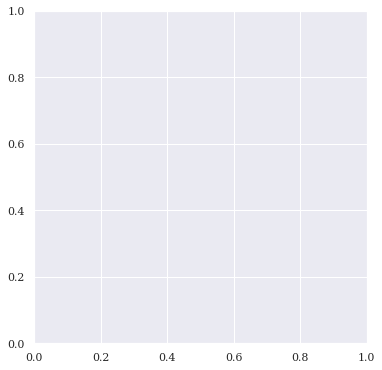

In [9]:
fig, ax = plt.subplots(figsize=(6, 6))
gdf.plot(column='residuals', cmap = 'coolwarm', linewidth=0.01, scheme = 'FisherJenks', k=5, legend=True, legend_kwds={'bbox_to_anchor':(1.10, 0.96)},  ax=ax)
ax.set_title('residuals', fontsize=12)
ax.axis("off")
plt.show()
print(gdf["price_small"].mean())

In [9]:
def pTest(val, mean, std, sigma=2):
    return (val - mean)
    #return int(np.abs((val - mean)/std) > sigma)

In [10]:
gdf["p-test"] = gdf[["price", "price_mean", "price_std"]].apply(lambda x: pTest(x[0], x[1],x[2]), axis=1)

<AxesSubplot: >

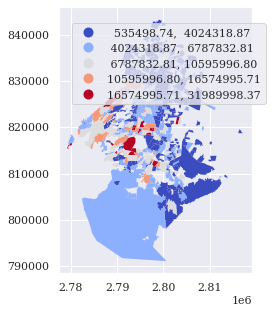

In [11]:
gdf.plot(column=("p-test"), cmap = 'coolwarm', linewidth=0.01, scheme = 'FisherJenks', k=5, legend=True, legend_kwds={'bbox_to_anchor':(1.10, 0.96)})


# Fit GWR model

In [12]:
for column in tree_Importance.columns:
    gdf[f"importance_{column}"] = tree_Importance[column]
gdf["importance_bedrooms"]

0      0.982585
1      0.125063
2      0.408080
3      0.487839
4      0.522961
         ...   
694    0.339751
695    0.141194
696    0.112689
697    0.404289
698    0.810372
Name: importance_bedrooms, Length: 699, dtype: float64

In [15]:
# TODO change to sf_result
# Add R2 to GeoDataframe 
# gdf['gwr_R2'] = gwr_results.localR2

In [16]:
# TODO change to RF
# fig, ax = plt.subplots(figsize=(6, 6))
# gdf.plot(column='gwr_R2', cmap = 'coolwarm', linewidth=0.01, scheme = 'FisherJenks', k=5, legend=True, legend_kwds={'bbox_to_anchor':(1.10, 0.96)},  ax=ax)
# ax.set_title('Local R2', fontsize=12)
# ax.axis("off")
# gdf.explore()
# plt.show()

# Plot coefficients

In [ ]:
coef_names = tree_Importance.columns
for i in coef_names:
    fig, ax = plt.subplots(figsize=(6, 6))
    gdf.plot(column=("importance_" + i), cmap = 'coolwarm', linewidth=0.01, scheme = 'FisherJenks', k=5, legend=True, legend_kwds={'bbox_to_anchor':(1.10, 0.96)},  ax=ax)
    ax.set_title(i, fontsize=12)
    ax.axis("off")
    #plt.savefig('myMap.png',dpi=150, bbox_inches='tight')
    plt.show()

In [17]:
# # Filter t-values: standard alpha = 0.05
# gwr_filtered_t = gwr_results.filter_tvals(alpha = 0.05)

In [18]:
# pd.DataFrame(gwr_filtered_t)

0         1          2          3         4         5    6    7   \
0    0.000000  0.000000   5.328285   7.622939  0.000000  0.000000  0.0  0.0   
1    0.000000  0.000000   5.606729   8.435574  0.000000  0.000000  0.0  0.0   
2    0.000000  0.000000   6.702092   9.556943  0.000000  0.000000  0.0  0.0   
3    2.412698  0.000000   7.371043   7.450758  0.000000  0.000000  0.0  0.0   
4    0.000000  0.000000   5.861772   8.737942  0.000000  0.000000  0.0  0.0   
..        ...       ...        ...        ...       ...       ...  ...  ...   
696  4.741526 -2.462100   9.030539   7.824386  0.000000  2.653355  0.0  0.0   
697  3.373668  0.000000   8.095958   8.008405  2.367840  2.395420  0.0  0.0   
698  3.278947  0.000000   8.007473   7.873563  2.413330  2.303230  0.0  0.0   
699  5.590563 -2.985674  10.388204   8.804667  2.121115  2.945338  0.0  0.0   
700  6.146889 -3.199778  11.601274  10.474533  0.000000  2.237995  0.0  0.0   

           8    9    10   11   12   13   14   15   16        17   18   19  \
0    0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
1    0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
2    0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
3    0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
4    0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
..        ...  ...  ...  ...  ...  ...  ...  ...  ...       ...  ...  ...   
696  2.915767  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
697  2.743440  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
698  2.809870  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
699  2.502893  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  2.054680  0.0  0.0   
700  2.021802  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  2.326776  0.0  0.0   

           20   21        22        23   24   25        26        27   28  \
0   -2.649516  0.0  0.000000  2.992906  0.0  0.0  0.000000  0.000000  0.0   
1   -2.558723  0.0  0.000000  3.107628  0.0  0.0  0.000000  0.000000  0.0   
2   -2.335046  0.0  0.000000  3.993033  0.0  0.0  0.000000 -2.570763  0.0   
3    0.000000  0.0 -2.576611  2.236793  0.0  0.0  0.000000  0.000000  0.0   
4   -2.568656  0.0  0.000000  3.443868  0.0  0.0  0.000000  0.000000  0.0   
..        ...  ...       ...       ...  ...  ...       ...       ...  ...   
696 -3.217373  0.0 -2.990159  0.000000  0.0  0.0 -5.541320  0.000000  0.0   
697 -2.464499  0.0  0.000000  0.000000  0.0  0.0 -5.009129 -1.981224  0.0   
698 -2.505697  0.0  0.000000  0.000000  0.0  0.0 -4.829815  0.000000  0.0   
699 -2.900099  0.0 -2.669723  0.000000  0.0  0.0 -6.580160  0.000000  0.0   
700 -3.466477  0.0 -3.578467  0.000000  0.0  0.0 -5.700672  0.000000  0.0   

           29        30        31        32        33        34   35  
0    0.000000  0.000000 -3.728239  3.400287  4.351372  0.000000  0.0  
1    0.000000 -2.052324 -3.484816  3.418217  4.474380  0.000000  0.0  
2    0.000000  0.000000 -2.672517  2.953712  5.181020 -2.507022  0.0  
3    0.000000  0.000000 -3.174046  0.000000  3.116796  0.000000  0.0  
4    0.000000 -1.975194 -3.415625  3.381077  4.721547 -2.003861  0.0  
..        ...       ...       ...       ...       ...       ...  ...  
696 -2.630859  0.000000  0.000000  0.000000  0.000000  0.000000  0.0  
697 -3.971985  0.000000 -3.431741  0.000000  0.000000  0.000000  0.0  
698 -3.924800  0.000000 -3.334254  0.000000  0.000000  0.000000  0.0  
699 -2.935552  0.000000  0.000000  0.000000  0.000000  0.000000  0.0  
700  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.0  

[701 rows x 36 columns]

In [19]:
# Filter t-values: corrected alpha due to multiple testing
gwr_filtered_tc = gwr_results.filter_tvals()

In [20]:
pd.DataFrame(gwr_filtered_tc)

0         1          2          3        4         5    6    7   \
0    0.000000  0.000000   5.328285   7.622939  0.00000  0.000000  0.0  0.0   
1    0.000000  0.000000   5.606729   8.435574  0.00000  0.000000  0.0  0.0   
2    0.000000  0.000000   6.702092   9.556943  0.00000  0.000000  0.0  0.0   
3    2.412698  0.000000   7.371043   7.450758  0.00000  0.000000  0.0  0.0   
4    0.000000  0.000000   5.861772   8.737942  0.00000  0.000000  0.0  0.0   
..        ...       ...        ...        ...      ...       ...  ...  ...   
696  4.741526 -2.462100   9.030539   7.824386  0.00000  2.653355  0.0  0.0   
697  3.373668  0.000000   8.095958   8.008405  0.00000  2.395420  0.0  0.0   
698  3.278947  0.000000   8.007473   7.873563  2.41333  0.000000  0.0  0.0   
699  5.590563 -2.985674  10.388204   8.804667  0.00000  2.945338  0.0  0.0   
700  6.146889 -3.199778  11.601274  10.474533  0.00000  0.000000  0.0  0.0   

           8    9    10   11   12   13   14   15   16   17   18   19  \
0    0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1    0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2    0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3    0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4    0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
..        ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
696  2.915767  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
697  2.743440  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
698  2.809870  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
699  2.502893  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
700  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

           20   21        22        23   24   25        26        27   28  \
0   -2.649516  0.0  0.000000  2.992906  0.0  0.0  0.000000  0.000000  0.0   
1   -2.558723  0.0  0.000000  3.107628  0.0  0.0  0.000000  0.000000  0.0   
2    0.000000  0.0  0.000000  3.993033  0.0  0.0  0.000000 -2.570763  0.0   
3    0.000000  0.0 -2.576611  0.000000  0.0  0.0  0.000000  0.000000  0.0   
4   -2.568656  0.0  0.000000  3.443868  0.0  0.0  0.000000  0.000000  0.0   
..        ...  ...       ...       ...  ...  ...       ...       ...  ...   
696 -3.217373  0.0 -2.990159  0.000000  0.0  0.0 -5.541320  0.000000  0.0   
697 -2.464499  0.0  0.000000  0.000000  0.0  0.0 -5.009129  0.000000  0.0   
698 -2.505697  0.0  0.000000  0.000000  0.0  0.0 -4.829815  0.000000  0.0   
699 -2.900099  0.0 -2.669723  0.000000  0.0  0.0 -6.580160  0.000000  0.0   
700 -3.466477  0.0 -3.578467  0.000000  0.0  0.0 -5.700672  0.000000  0.0   

           29   30        31        32        33        34   35  
0    0.000000  0.0 -3.728239  3.400287  4.351372  0.000000  0.0  
1    0.000000  0.0 -3.484816  3.418217  4.474380  0.000000  0.0  
2    0.000000  0.0 -2.672517  2.953712  5.181020 -2.507022  0.0  
3    0.000000  0.0 -3.174046  0.000000  3.116796  0.000000  0.0  
4    0.000000  0.0 -3.415625  3.381077  4.721547  0.000000  0.0  
..        ...  ...       ...       ...       ...       ...  ...  
696 -2.630859  0.0  0.000000  0.000000  0.000000  0.000000  0.0  
697 -3.971985  0.0 -3.431741  0.000000  0.000000  0.000000  0.0  
698 -3.924800  0.0 -3.334254  0.000000  0.000000  0.000000  0.0  
699 -2.935552  0.0  0.000000  0.000000  0.000000  0.000000  0.0  
700  0.000000  0.0  0.000000  0.000000  0.000000  0.000000  0.0  

[701 rows x 36 columns]

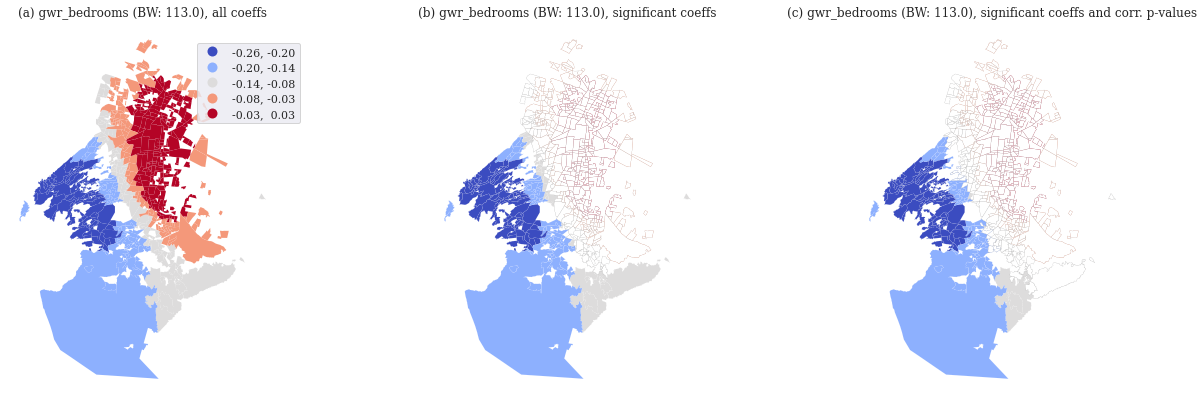

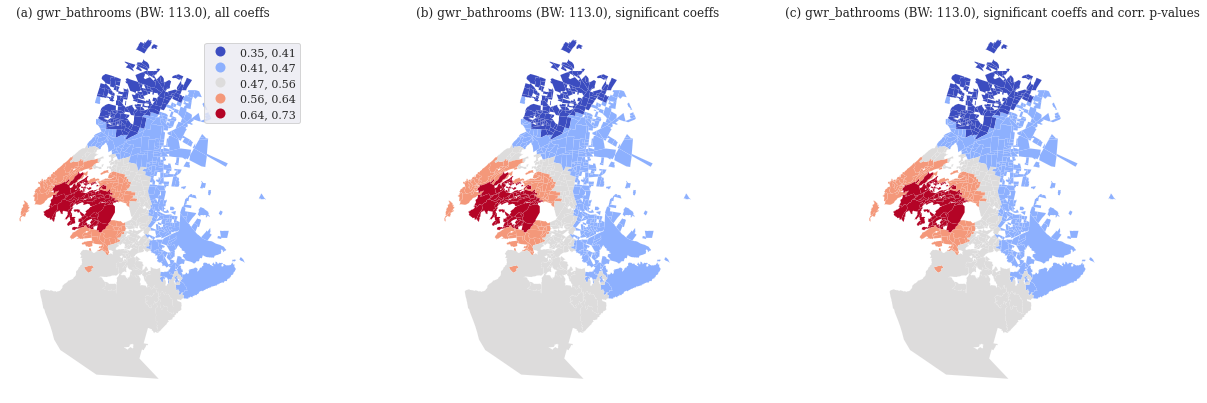

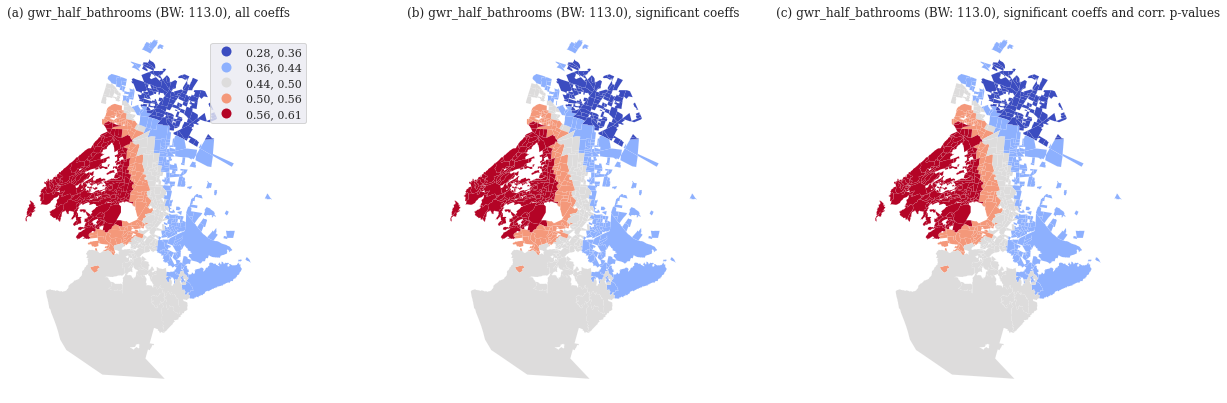

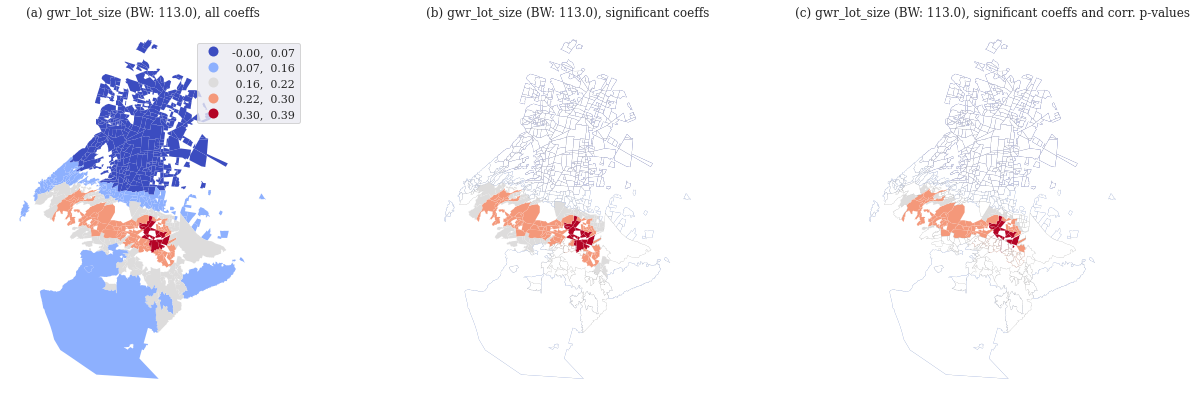

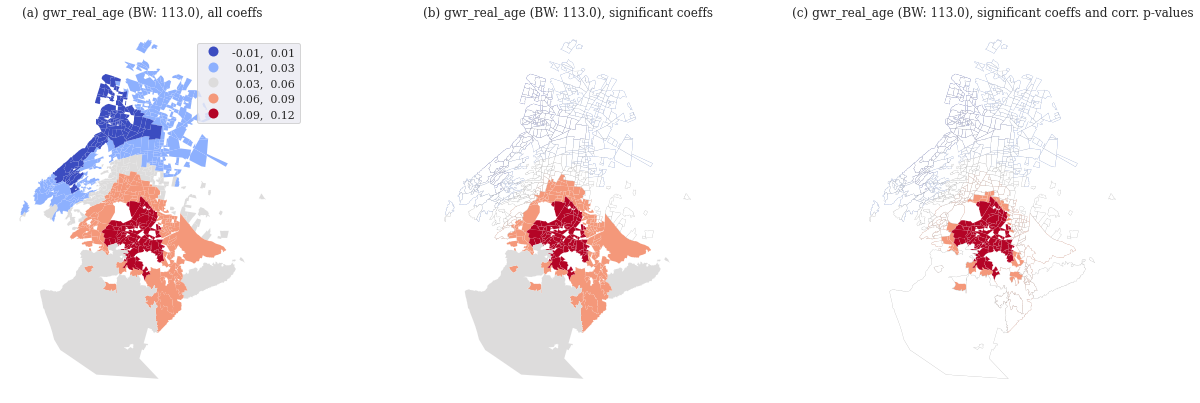

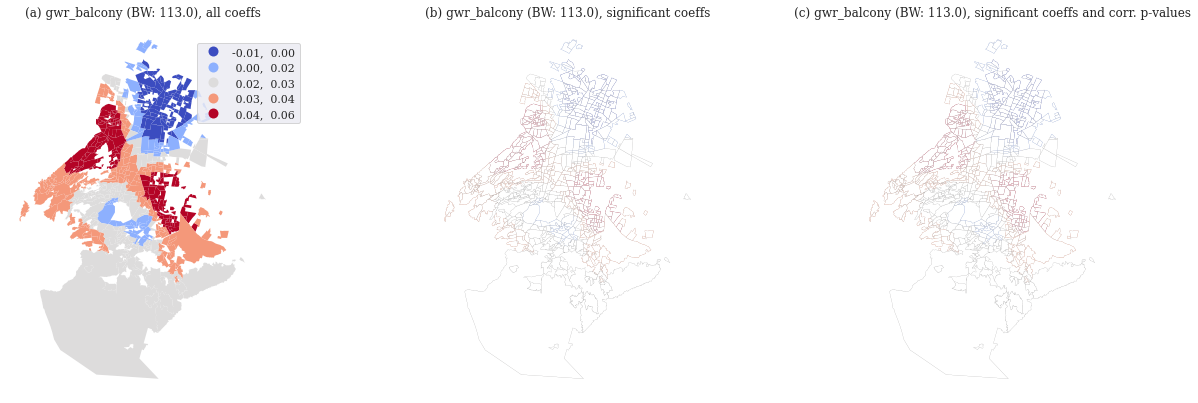

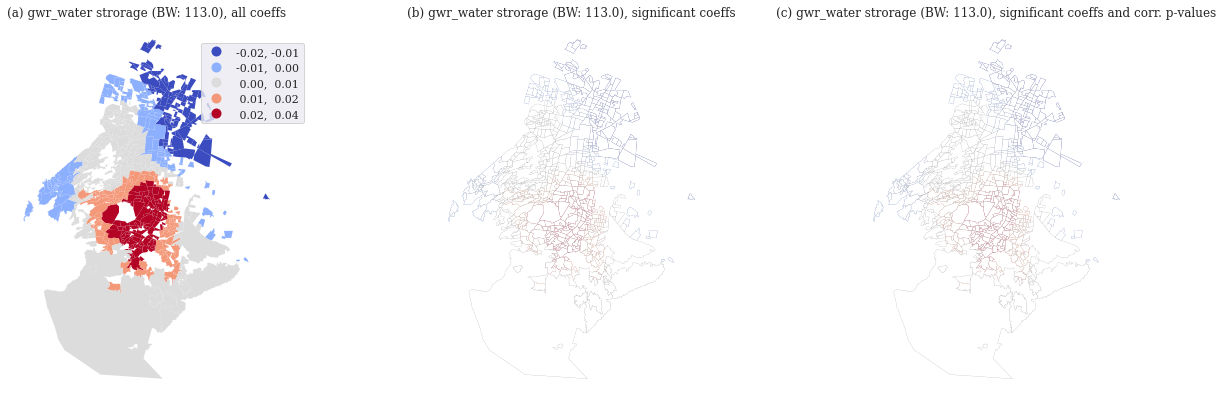

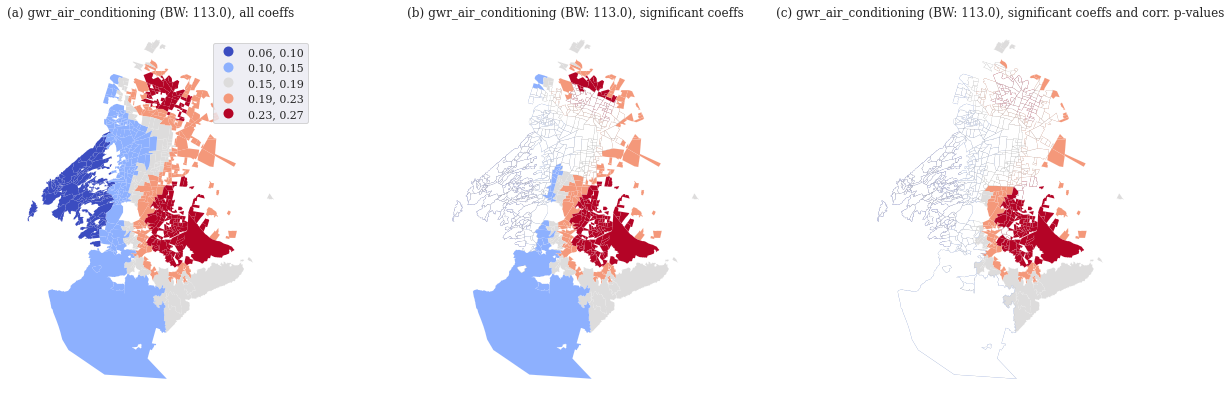

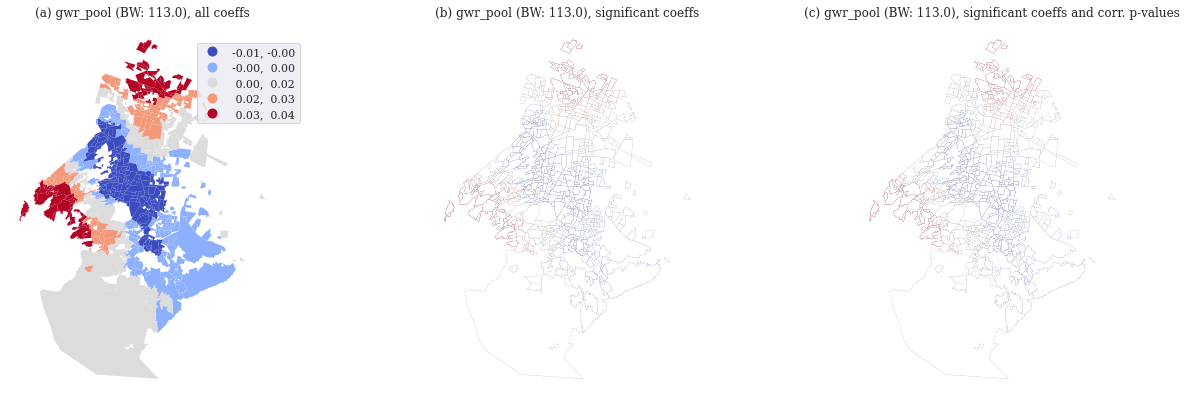

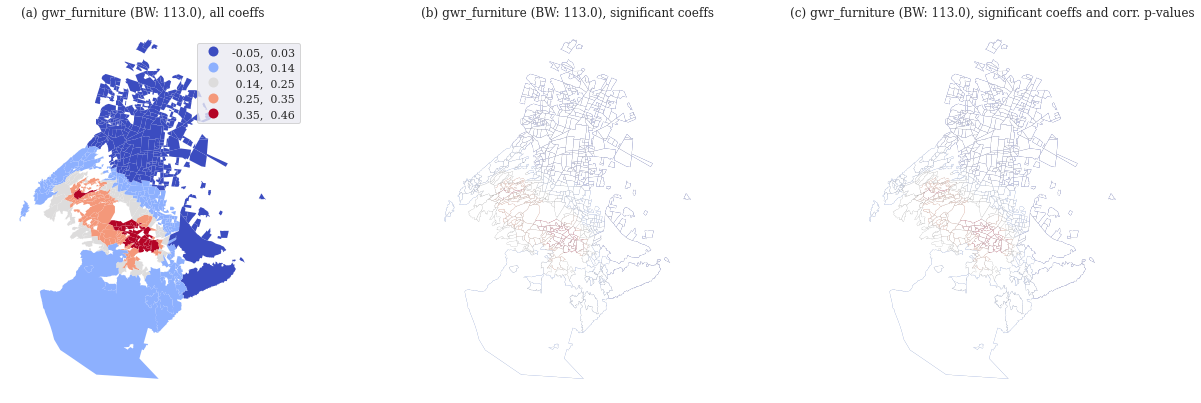

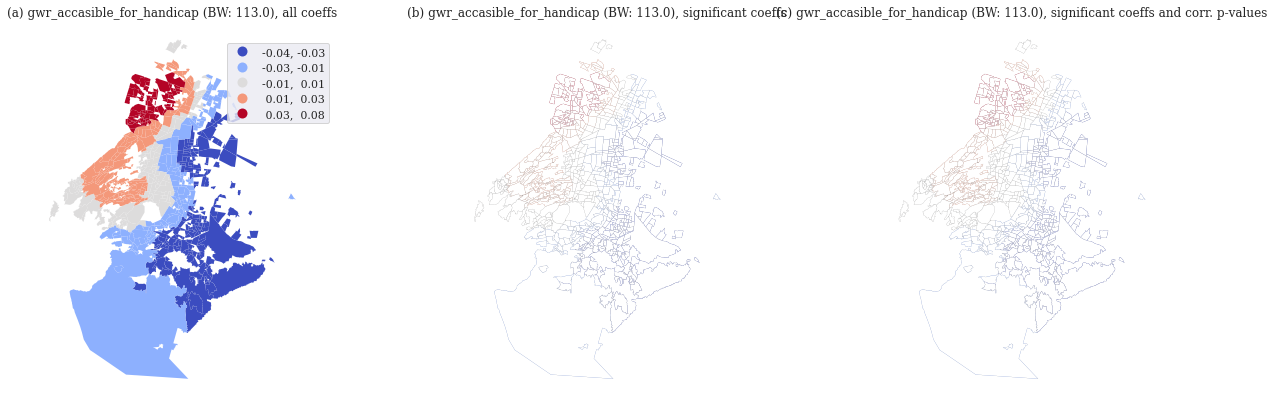

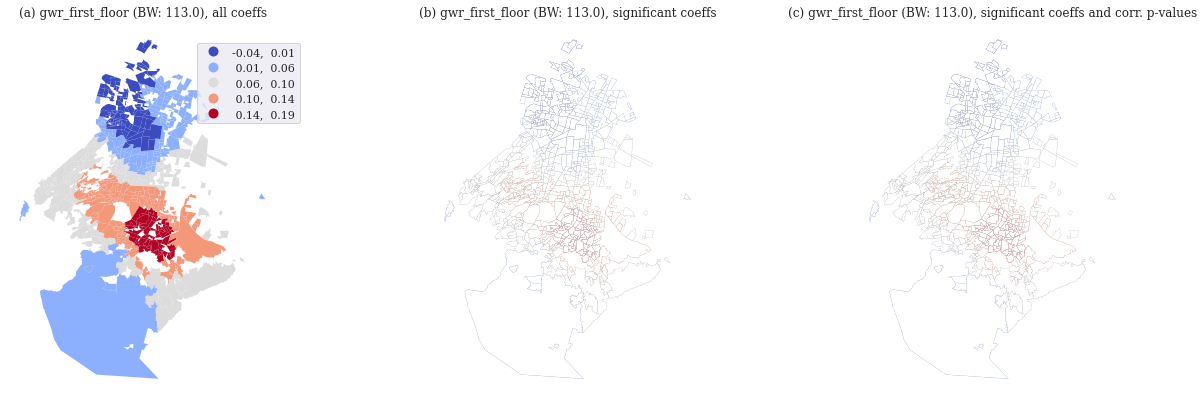

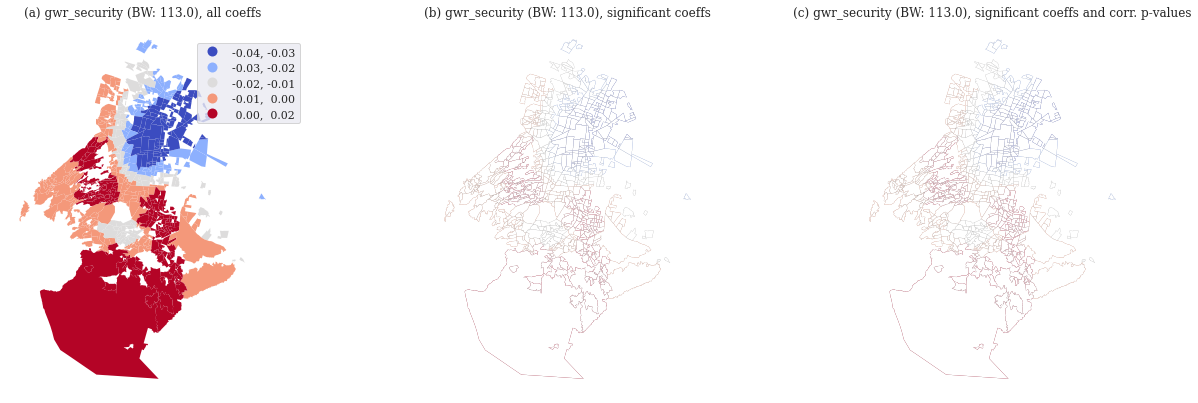

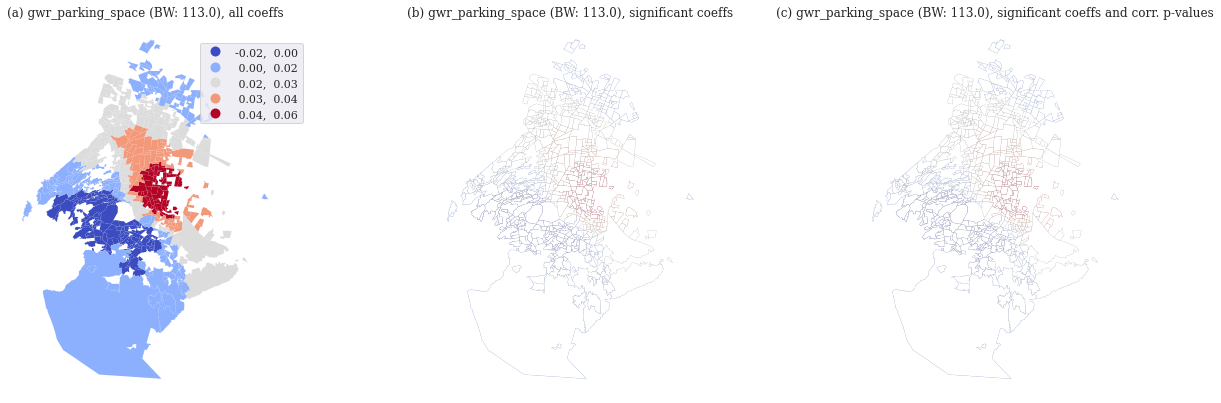

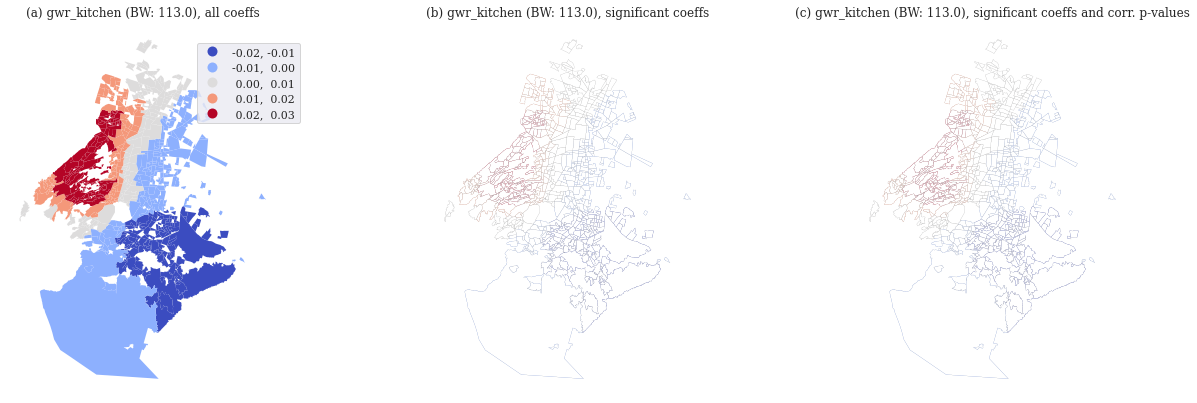

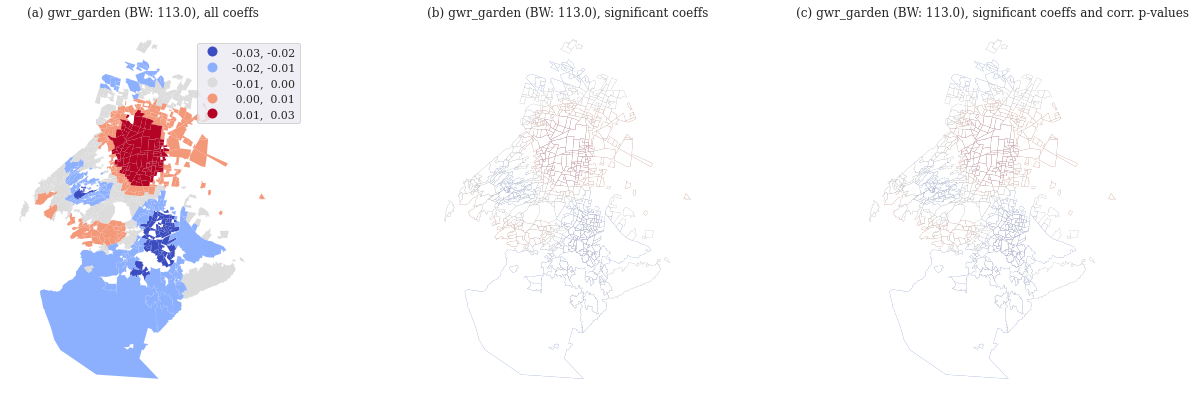

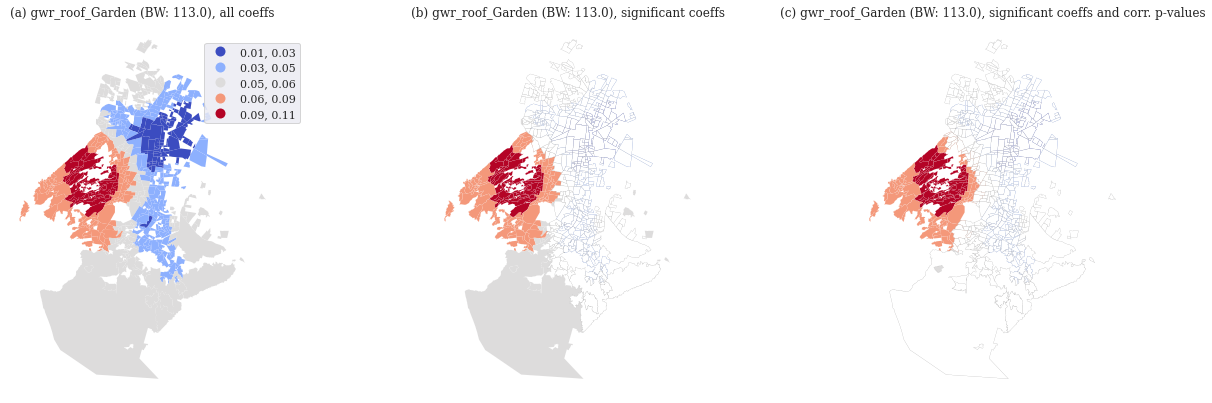

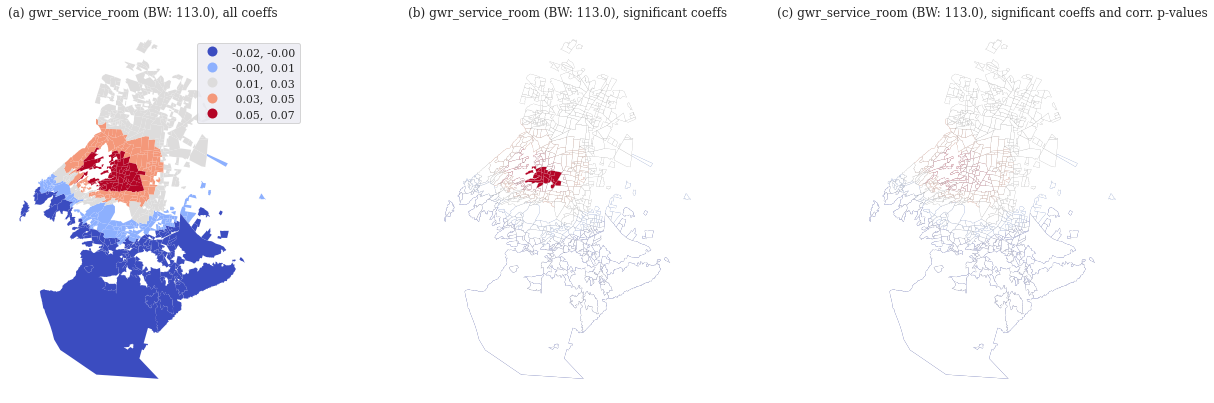

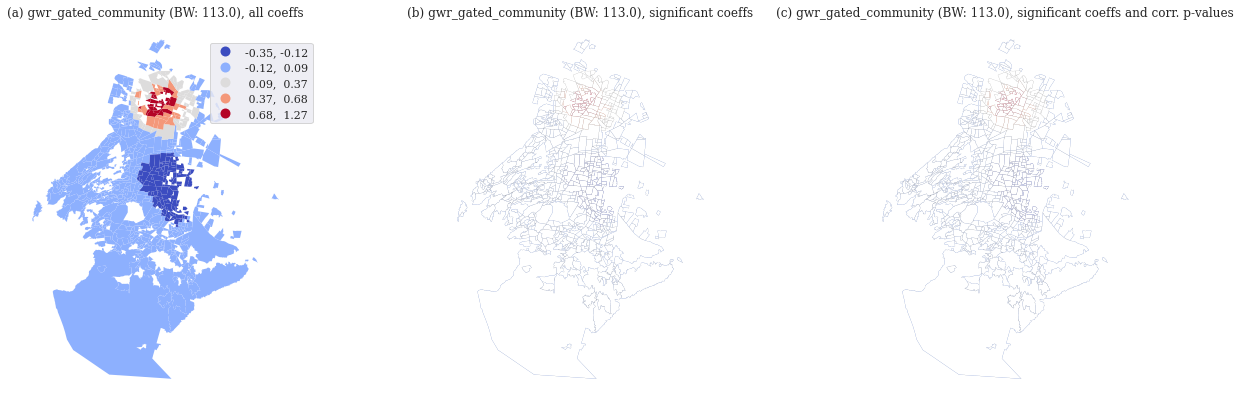

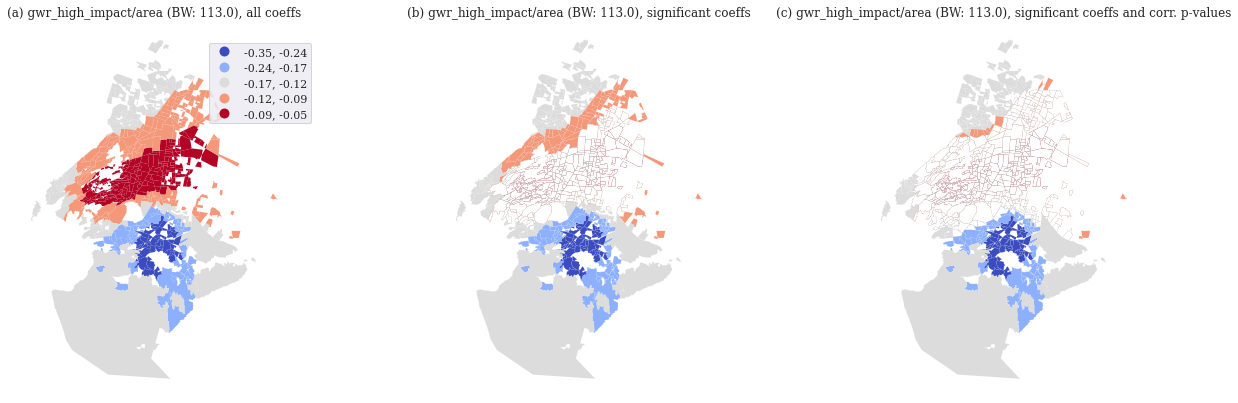

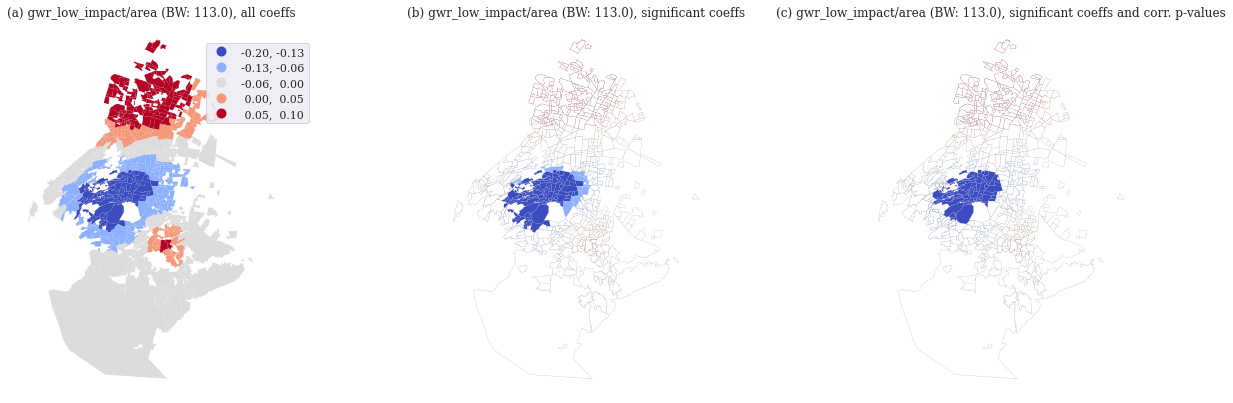

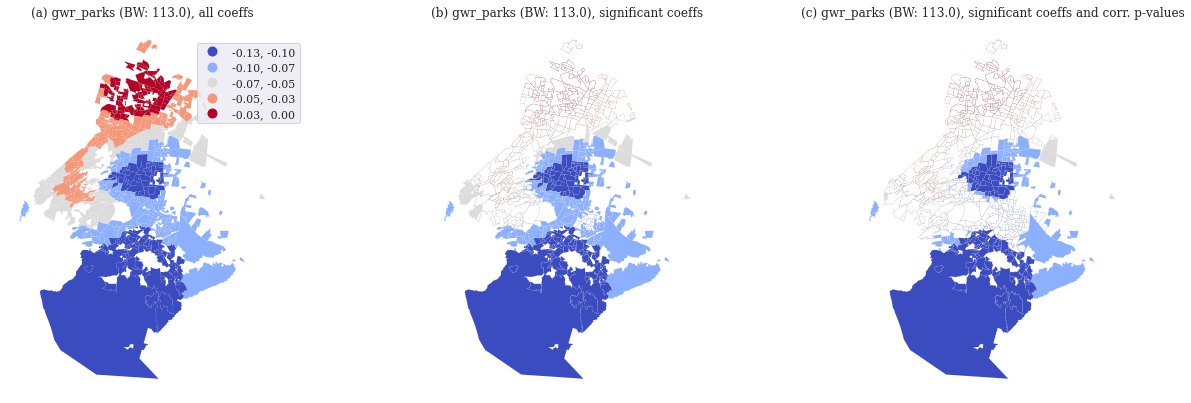

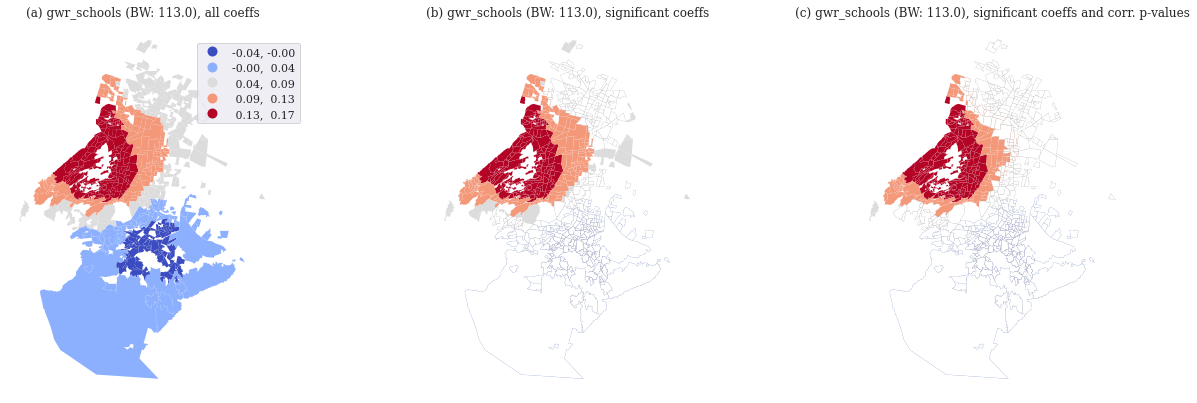

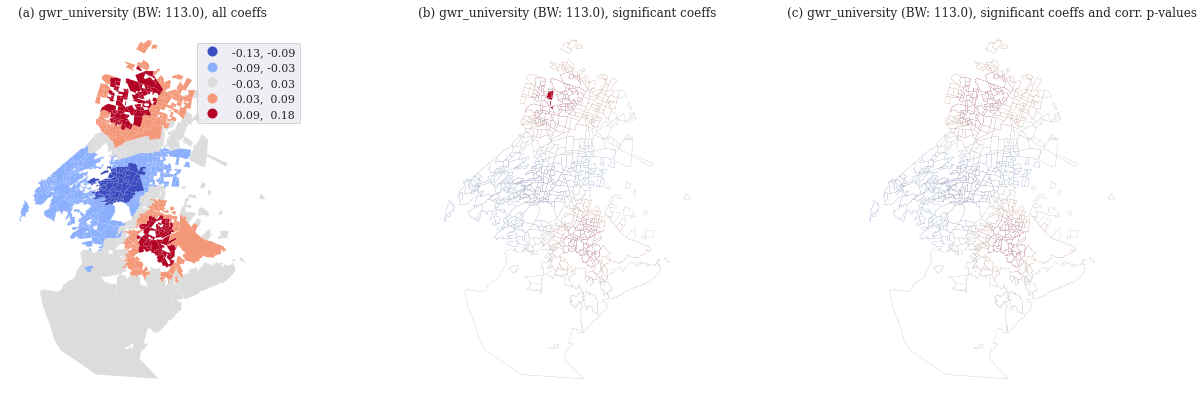

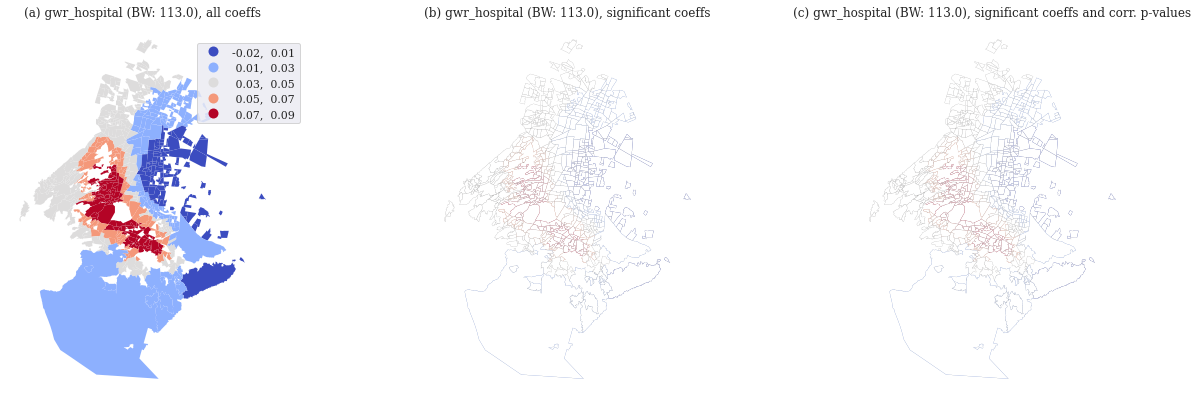

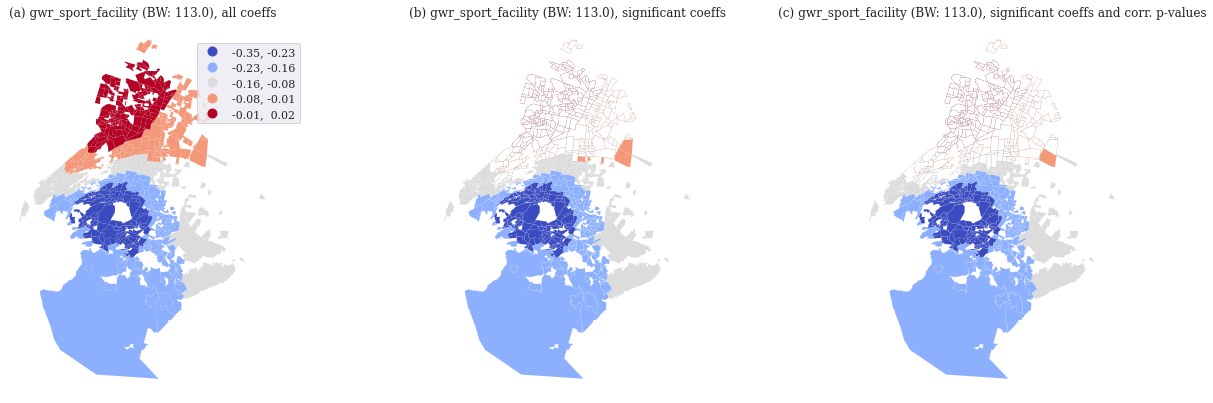

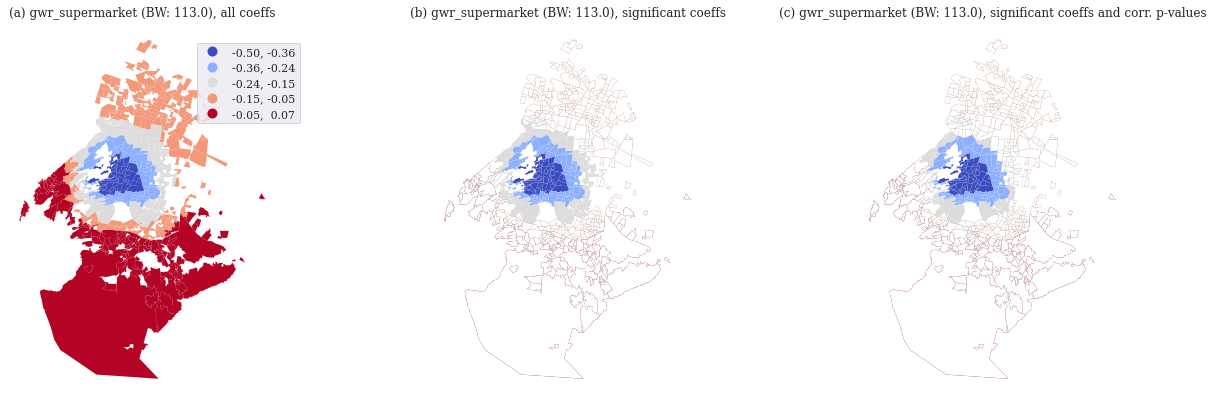

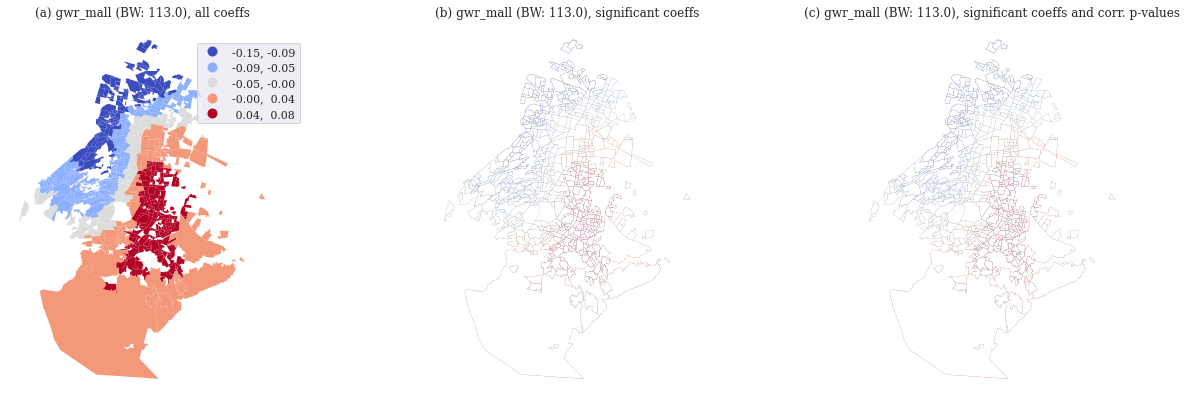

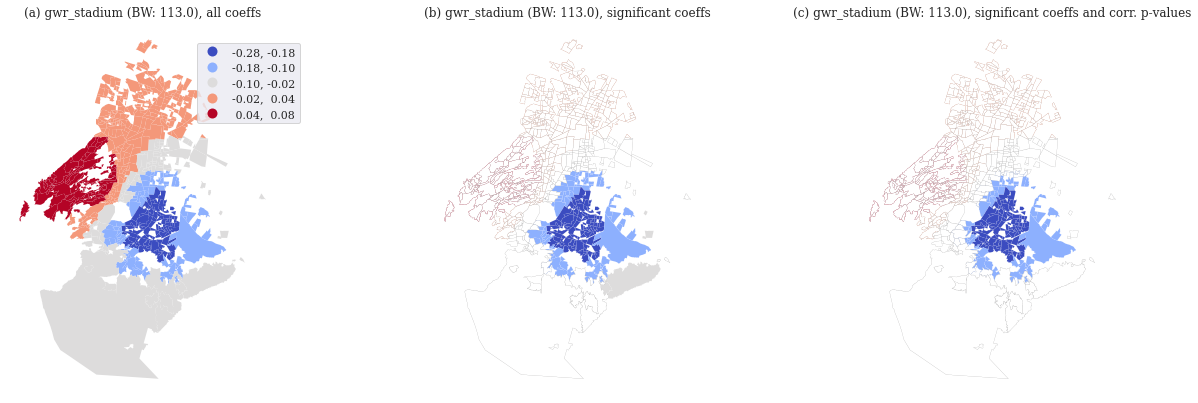

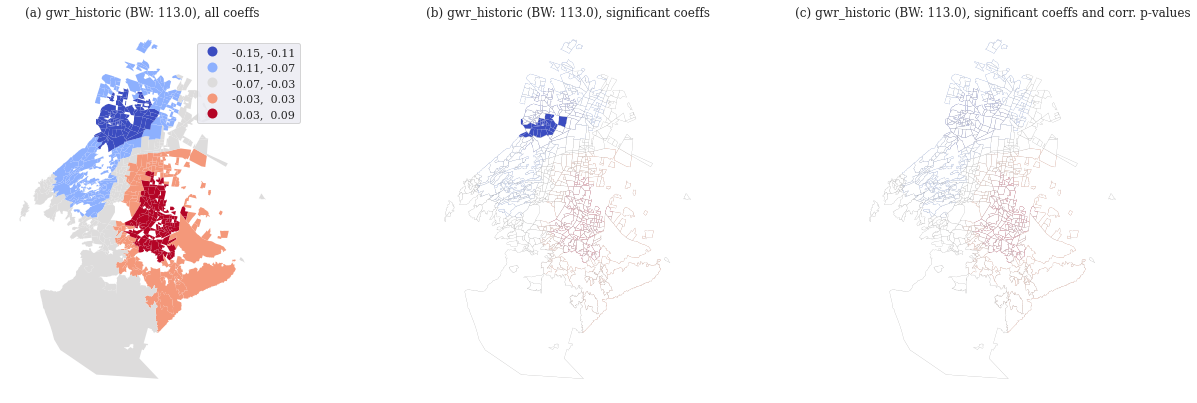

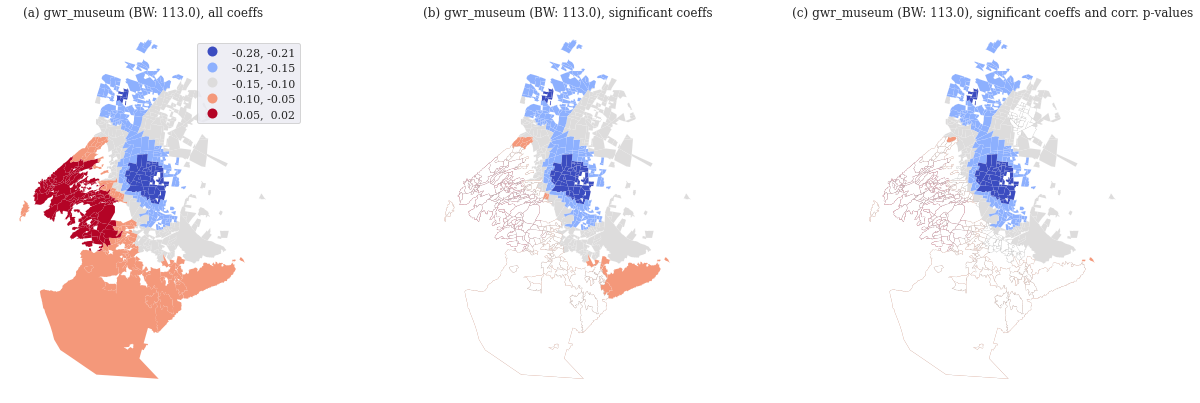

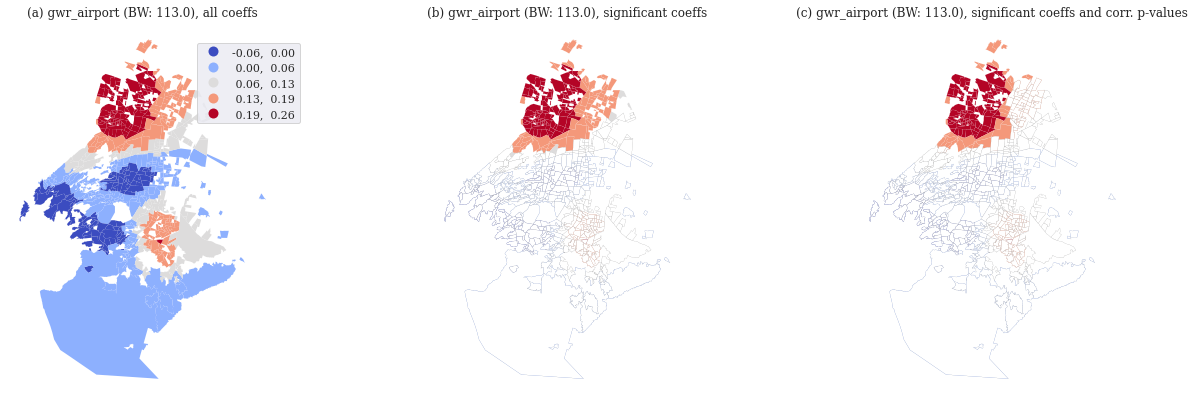

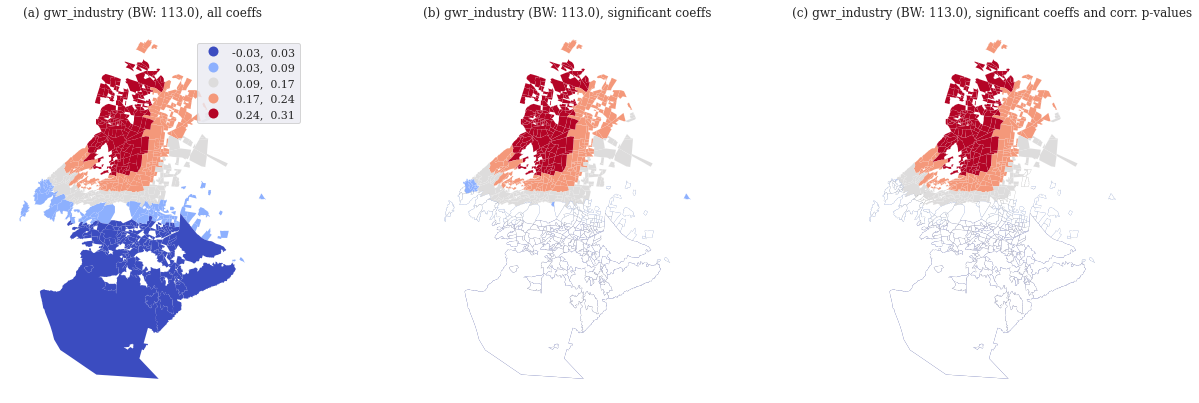

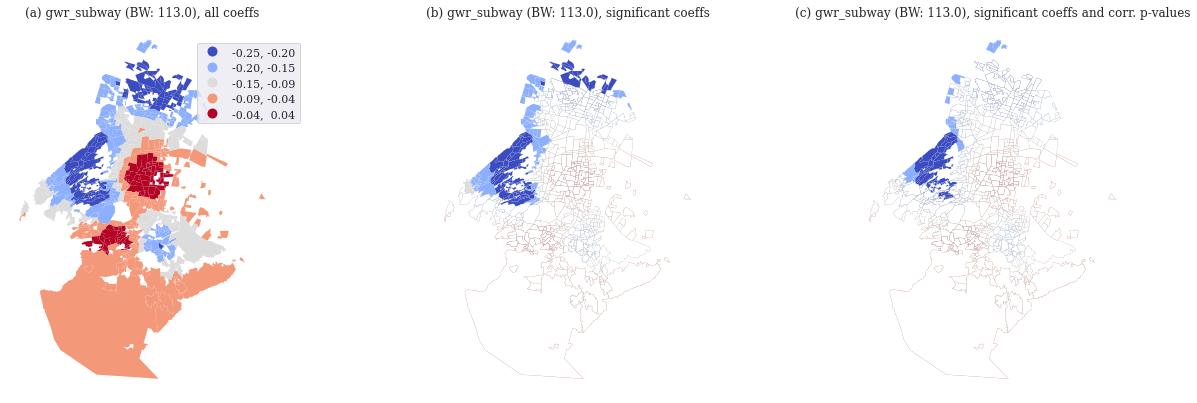

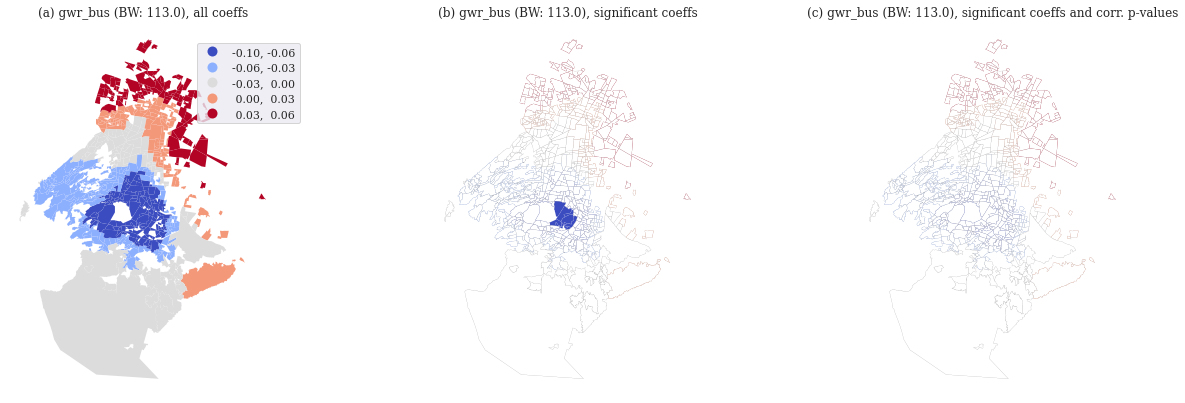

In [21]:
for num,col in enumerate (coef_names):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,6))

    gdf.plot(column= col, cmap = 'coolwarm', linewidth=0.01, scheme = 'FisherJenks', k=5, legend=True, legend_kwds={'bbox_to_anchor':(1.10, 0.96)},  ax=axes[0])

    gdf.plot(column= col, cmap = 'coolwarm', linewidth=0.05, scheme = 'FisherJenks', k=5, legend=False, legend_kwds={'bbox_to_anchor':(1.10, 0.96)},  ax=axes[1])
    gdf[gwr_filtered_t[:,num+1] == 0].plot(color='white', linewidth=0.05, edgecolor='black', ax=axes[1])


    gdf.plot(column= col, cmap = 'coolwarm', linewidth=0.05, scheme = 'FisherJenks', k=5, legend=False, legend_kwds={'bbox_to_anchor':(1.10, 0.96)},  ax=axes[2])
    gdf[gwr_filtered_tc[:,num+1] == 0].plot(color='white', linewidth=0.05, edgecolor='black', ax=axes[2])

    plt.tight_layout()

    axes[0].axis("off")
    axes[1].axis("off")
    axes[2].axis("off")

    axes[0].set_title('(a) '+ col +' (BW: ' + str(gwr_bw) +'), all coeffs', fontsize=12)
    axes[1].set_title('(b) '+ col+' (BW: ' + str(gwr_bw) +'), significant coeffs',     fontsize=12)
    axes[2].set_title('(c) '+col +' (BW: ' + str(gwr_bw) +'), significant coeffs and corr. p-values',     fontsize=12)
    plt.show()